In [1]:
!pip install spacy
!pip install pandas
!pip install nltk
!pip install language-tool-python
!pip install openpyxl

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import sent_tokenize

import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
excel = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Lidia/datosLidia.xlsx", engine="openpyxl")

In [4]:
if 'Marca temporal' in excel.columns:
    excel = excel.drop('Marca temporal', axis=1)
else:
    print("No se encontró la columna 'Marca temporal'.")


In [5]:
# Separar las columnas
datos_numericos = excel.select_dtypes(include=['number'])  # datos numéricos
data_categorico = excel.select_dtypes(include=['object'])  # datos con texto

#print("Columnas con números:")
#print(datos_numericos)

#print("\nColumnas con texto:")
#print(data_categorico)

In [6]:
# Checar si exiten las columnas
if data_categorico.empty:
    print("\033[1m\033[34mNo se encontraron columnas con texto\033[0m")
else:
    # La primera columna como 'target_column'
    target_column = data_categorico.columns[0]
    y = excel[target_column]
    X = datos_numericos  # Datos numéricos como características

In [7]:
    # Ver los resultados
    print("\033[1m\033[34mColumna seleccionada:\033[0m")
    print(target_column)
    print("\033[1m\033[34m\n\nCategóricos (y):\033[0m")
    print(y)
    print("\033[1m\033[34m\n\nNuméricos (X):\033[0m")
    print(X)

Columna seleccionada:
¿Con qué frecuencia participas en actividades extracurriculares organizadas por la universidad?


Categóricos (y):
0       Casi nunca
1            Nunca
2       Casi nunca
3       Casi nunca
4          A veces
5          A veces
6       Casi nunca
7          A veces
8          A veces
9       Casi nunca
10         A veces
11    Casi siempre
12         A veces
13         A veces
14         A veces
15         A veces
16           Nunca
17           Nunca
18           Nunca
19    Casi siempre
20      Casi nunca
21      Casi nunca
22         A veces
23      Casi nunca
24           Nunca
25      Casi nunca
26         A veces
27         A veces
28         A veces
29         Siempre
30      Casi nunca
31      Casi nunca
32         Siempre
33      Casi nunca
34           Nunca
35         Siempre
36         Siempre
37      Casi nunca
38           Nunca
39         Siempre
40      Casi nunca
41    Casi siempre
42         Siempre
43         A veces
44           Nunca
45      

In [8]:
  # Validar existen datos faltantes
if X.empty or y.empty:
        print("\033[1m\033[34m Faltan datos. \033[0m")
else:
        # Ver los resultados
        print("\033[1m\033[34m Columna seleccionada: \033[0m")
        print(target_column)
        print("\033[1m\033[34m \n\nCategóricos (y): \033[0m")
        print(y)
        print("\033[1m\033[34m \n\nNuméricos (X): \033[0m")
        print(X)

 Columna seleccionada: 
¿Con qué frecuencia participas en actividades extracurriculares organizadas por la universidad?
 

Categóricos (y): 
0       Casi nunca
1            Nunca
2       Casi nunca
3       Casi nunca
4          A veces
5          A veces
6       Casi nunca
7          A veces
8          A veces
9       Casi nunca
10         A veces
11    Casi siempre
12         A veces
13         A veces
14         A veces
15         A veces
16           Nunca
17           Nunca
18           Nunca
19    Casi siempre
20      Casi nunca
21      Casi nunca
22         A veces
23      Casi nunca
24           Nunca
25      Casi nunca
26         A veces
27         A veces
28         A veces
29         Siempre
30      Casi nunca
31      Casi nunca
32         Siempre
33      Casi nunca
34           Nunca
35         Siempre
36         Siempre
37      Casi nunca
38           Nunca
39         Siempre
40      Casi nunca
41    Casi siempre
42         Siempre
43         A veces
44           Nunca
45  

In [9]:
!pip install wordcloud
!pip install seaborn

 Estadísticas descriptivas de los numéricos:
 
       En una escala del 1 al 10, ¿qué tan satisfecho estás con la calidad de la enseñanza en tu universidad?  \
count                                          60.000000                                                        
mean                                            7.866667                                                        
std                                             1.943844                                                        
min                                             1.000000                                                        
25%                                             7.000000                                                        
50%                                             8.000000                                                        
75%                                             9.000000                                                        
max                                            10

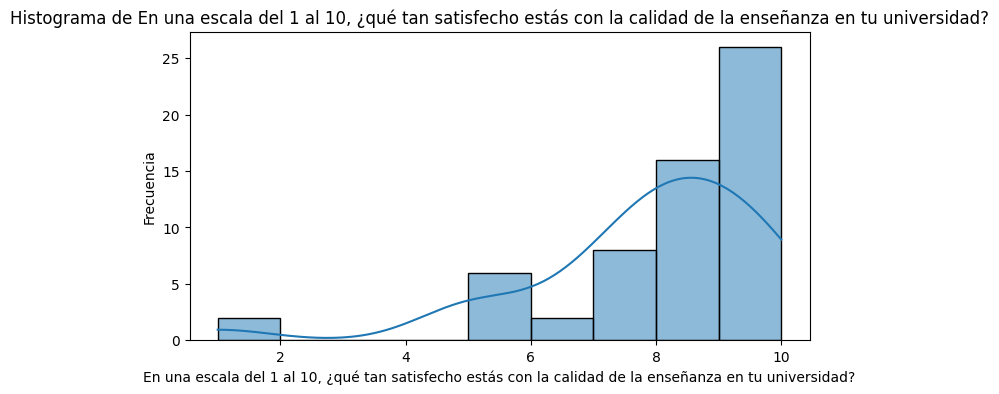

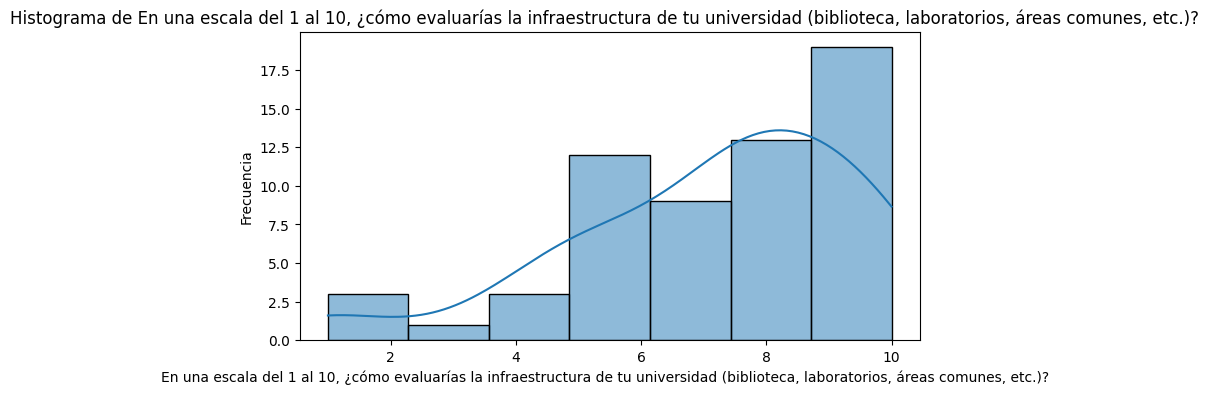

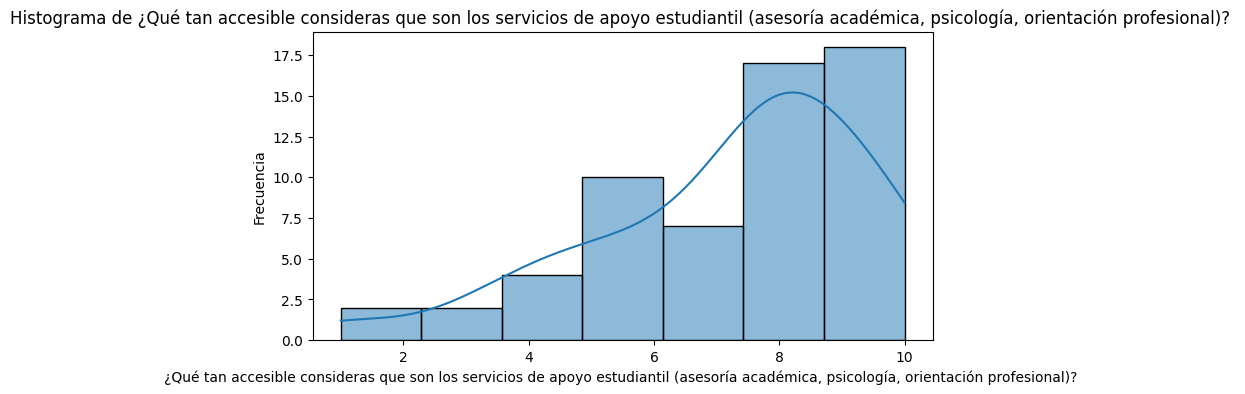

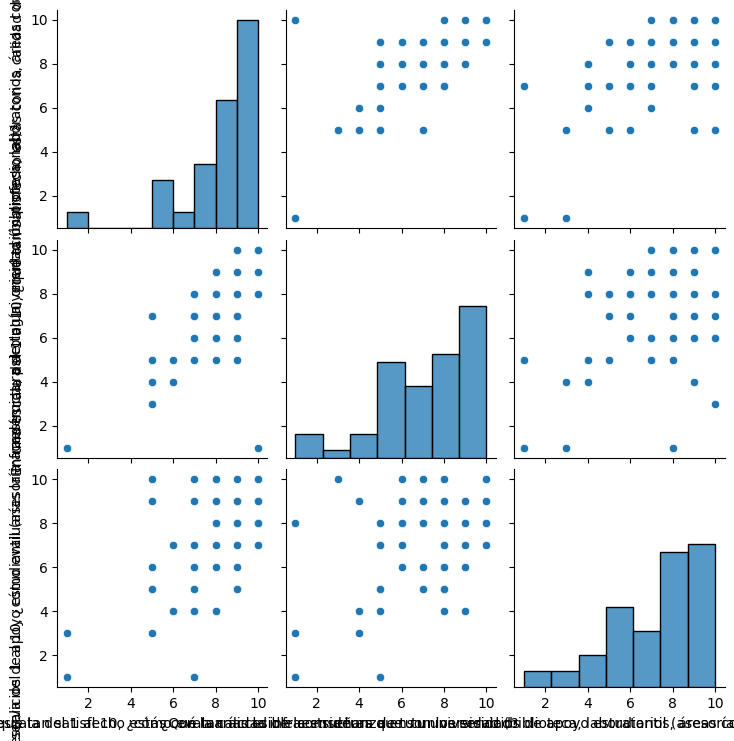

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

if not datos_numericos.empty:
    print("\033[1m\033[34m Estadísticas descriptivas de los numéricos:\n \033[0m")
    print(datos_numericos.describe())

    # Histogramas de cada columna numérica
    print("\033[1m\033[34m \nGenerando histogramas\n \033[0m")

    for column in datos_numericos.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(datos_numericos[column], kde=True)
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.show()

    # Diagramas de dispersión
    if datos_numericos.shape[1] > 1:
        sns.pairplot(datos_numericos)
        plt.show()

 
Análisis básico de los texto:
 


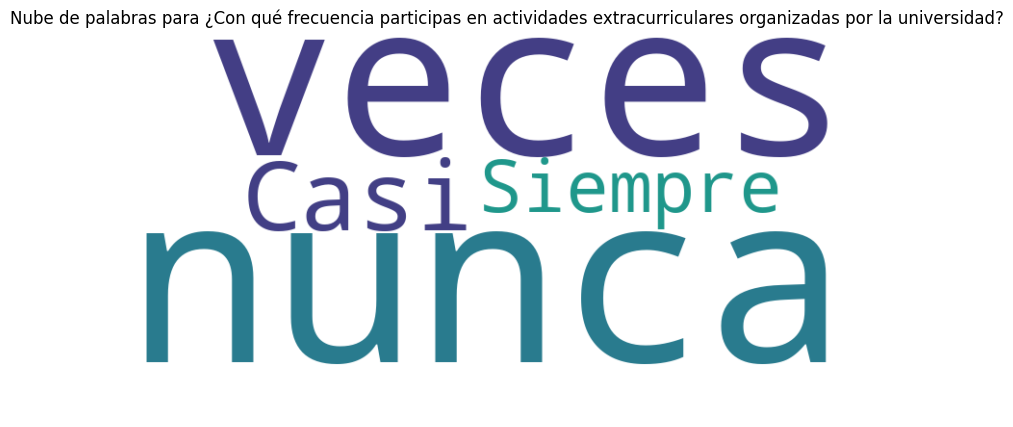

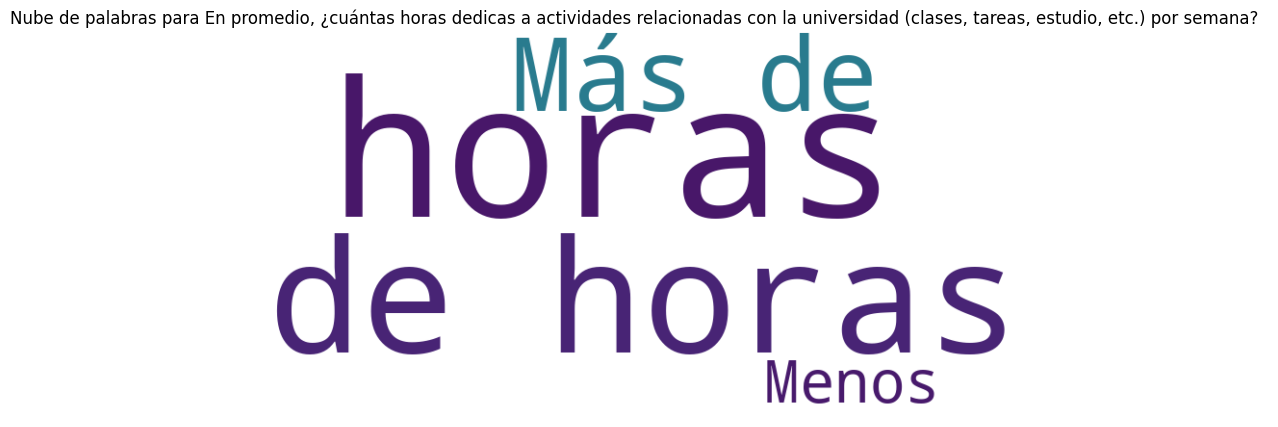

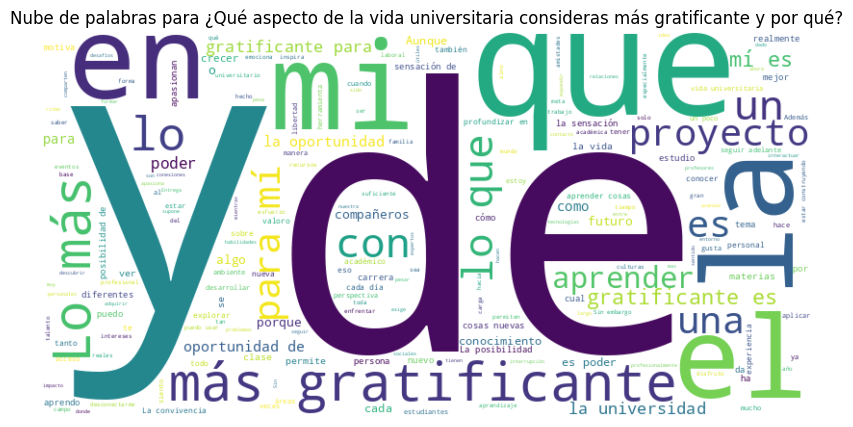

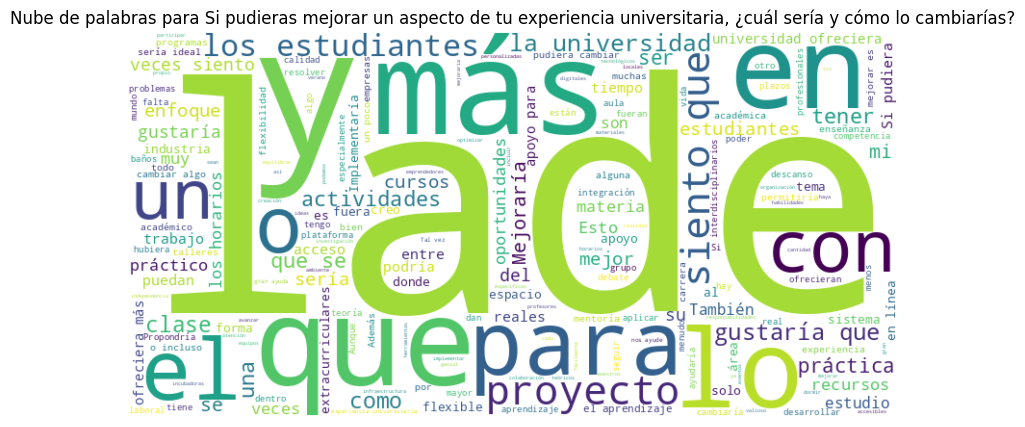

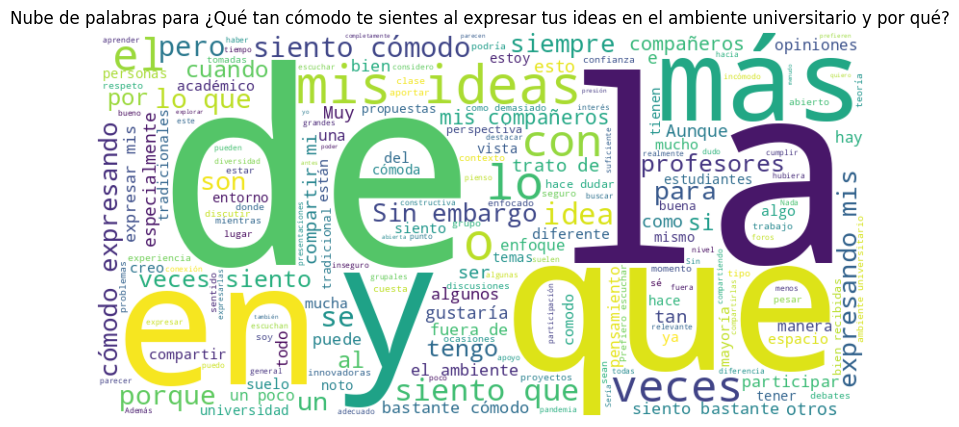

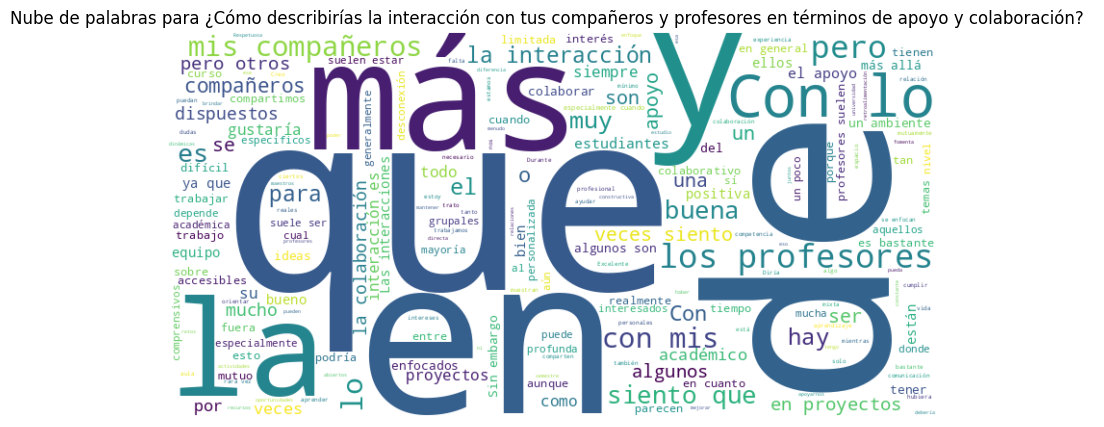

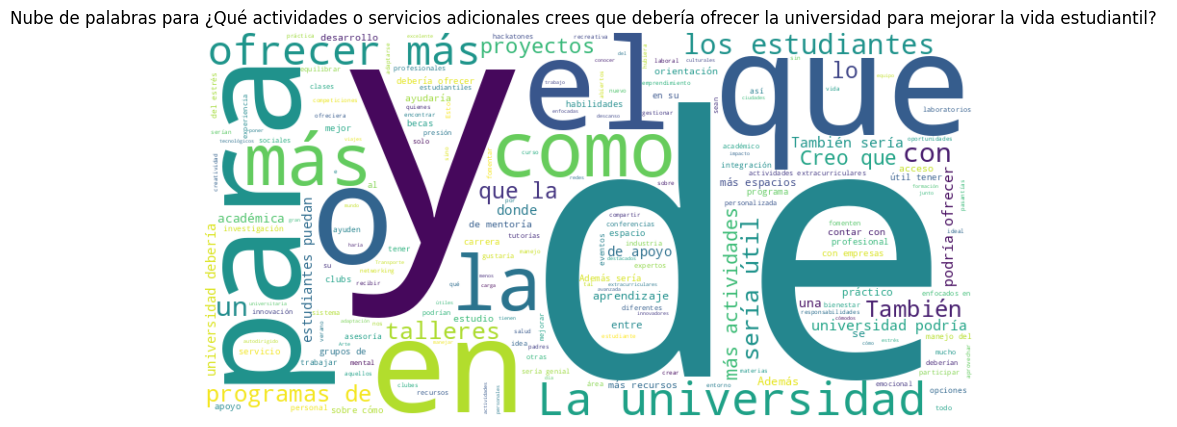

In [11]:
if not data_categorico.empty:
    print("\033[1m\033[34m \nAnálisis básico de los texto:\n \033[0m")

    # Nube de palabras
    for column in data_categorico.columns:
        text = " ".join(data_categorico[column].dropna().astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Nube de palabras para {column}')
        plt.axis('off')
        plt.show()
else:
    print("\033[1m\033[34m No se mostraron analisis \033[0m")

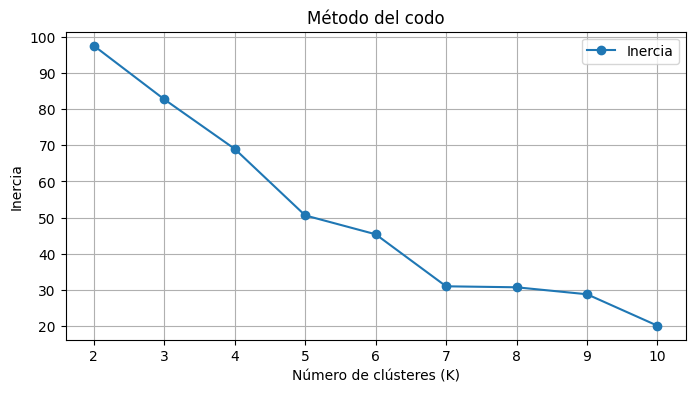

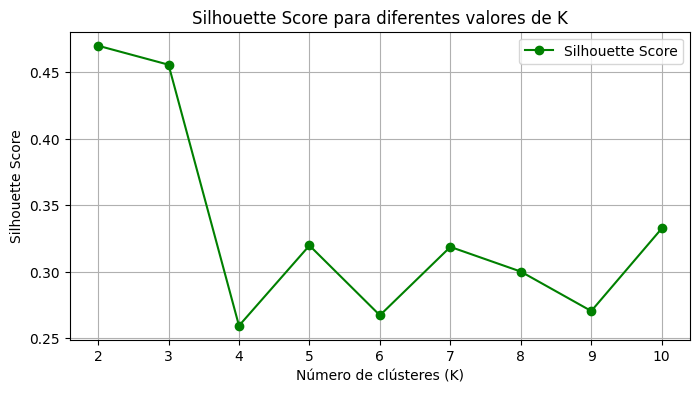

 

Resumen de clústeres con descripciones: 
   Cluster                                Cluster Descripción
0        0        Estudiantes satisfechos con infraestructura
1        1  Estudiantes que valoran las actividades extrac...
2        3  Estudiantes que necesitan mejorar la experienc...
3        2          Grupo con interés en el apoyo estudiantil





In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

numericos = excel.select_dtypes(include=['number'])
if not numericos.empty:
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(numericos)
    distortions = []
    silhouette_scores = []
    K = range(2, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(standardized_data)
        distortions.append(kmeans.inertia_)
        cluster_labels = kmeans.predict(standardized_data)
        silhouette_scores.append(silhouette_score(standardized_data, cluster_labels))

    # Gráfica del codo
    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, marker='o', label='Inercia')
    plt.title('Método del codo')
    plt.xlabel('Número de clústeres (K)')
    plt.ylabel('Inercia')
    plt.grid()
    plt.legend()
    plt.show()

    # Gráfica del silhouette score
    plt.figure(figsize=(8, 4))
    plt.plot(K, silhouette_scores, marker='o', color='green', label='Silhouette Score')
    plt.title('Silhouette Score para diferentes valores de K')
    plt.xlabel('Número de clústeres (K)')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.legend()
    plt.show()

    # 3. Aplicar K-means con el número óptimo de clústeres
    optimal_k = 4
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans.fit_predict(standardized_data)
    excel['Cluster'] = cluster_labels

    # 4. Definir nombres descriptivos para los clústeres
    cluster_analysis = {
        0: "Estudiantes satisfechos con infraestructura",
        1: "Estudiantes que valoran las actividades extracurriculares",
        2: "Grupo con interés en el apoyo estudiantil",
        3: "Estudiantes que necesitan mejorar la experiencia académica",
    }

    # Asignar los nombres descriptivos al DataFrame
    excel['Cluster Descripción'] = excel['Cluster'].map(cluster_analysis)
    print("\033[1m\033[34m \n\nResumen de clústeres con descripciones: \033[0m")
    print(excel[['Cluster', 'Cluster Descripción']].drop_duplicates())
    print("\n\n")


    if standardized_data.shape[1] >= 4:
        plt.figure(figsize=(8, 6))
        plt.scatter(standardized_data[:, 0], standardized_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, label='Centroides')
        plt.title('Visualización de los clústeres (Primeras dos dimensiones)')

        plt.legend()
        plt.grid()
        plt.show()

else:
    print("\033[1m\033[34m No hay datos para aplicar \033[0m")

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Filtrar columnas
categorical_columns = excel.select_dtypes(include=['object']).columns

# Usar numéricos como características
X = numericos

if not X.empty and not categorical_columns.empty:
    for column in categorical_columns:
        print(f"\033[1m\033[34m \n\n\nProcesando: {column} \033[0m")
        y = excel[column]

        class_counts = y.value_counts()
        valid_classes = class_counts[class_counts >= 3].index
        y_filtered = y[y.isin(valid_classes)]
        X_filtered = X.loc[y_filtered.index]

        if y_filtered.empty:
            print(f"\033[1m\033[31m No hay suficiente después de filtro. \033[0m")
            continue

        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y_filtered)

        # Datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_encoded, test_size=0.2, random_state=42)

        # Modelo Naive Bayes
        model = GaussianNB()
        model.fit(X_train, y_train)

        # Evaluar
        y_pred = model.predict(X_test)
        unique_classes = label_encoder.inverse_transform(sorted(set(y_test)))
        print(f"\033[1m\033[34m \nReporte de clasificación - '{column}':\033[0m")
        print(classification_report(y_test, y_pred, labels=sorted(set(y_test)), target_names=unique_classes, zero_division=1))

else:
    print("\033[1m\033[31m No se encontraron columnas adecuadas para entrenar el modelo. \033[0m")


 


Procesando: ¿Con qué frecuencia participas en actividades extracurriculares organizadas por la universidad? 
 
Reporte de clasificación - '¿Con qué frecuencia participas en actividades extracurriculares organizadas por la universidad?':
              precision    recall  f1-score   support

     A veces       0.60      1.00      0.75         6
  Casi nunca       1.00      0.33      0.50         3
       Nunca       0.00      0.00      0.00         2
     Siempre       1.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.65      0.33      0.31        12
weighted avg       0.63      0.58      0.50        12

 


Procesando: En promedio, ¿cuántas horas dedicas a actividades relacionadas con la universidad (clases, tareas, estudio, etc.) por semana?   
 
Reporte de clasificación - 'En promedio, ¿cuántas horas dedicas a actividades relacionadas con la universidad (clases, tareas, estudio, etc.) por semana?  ':
                 pr

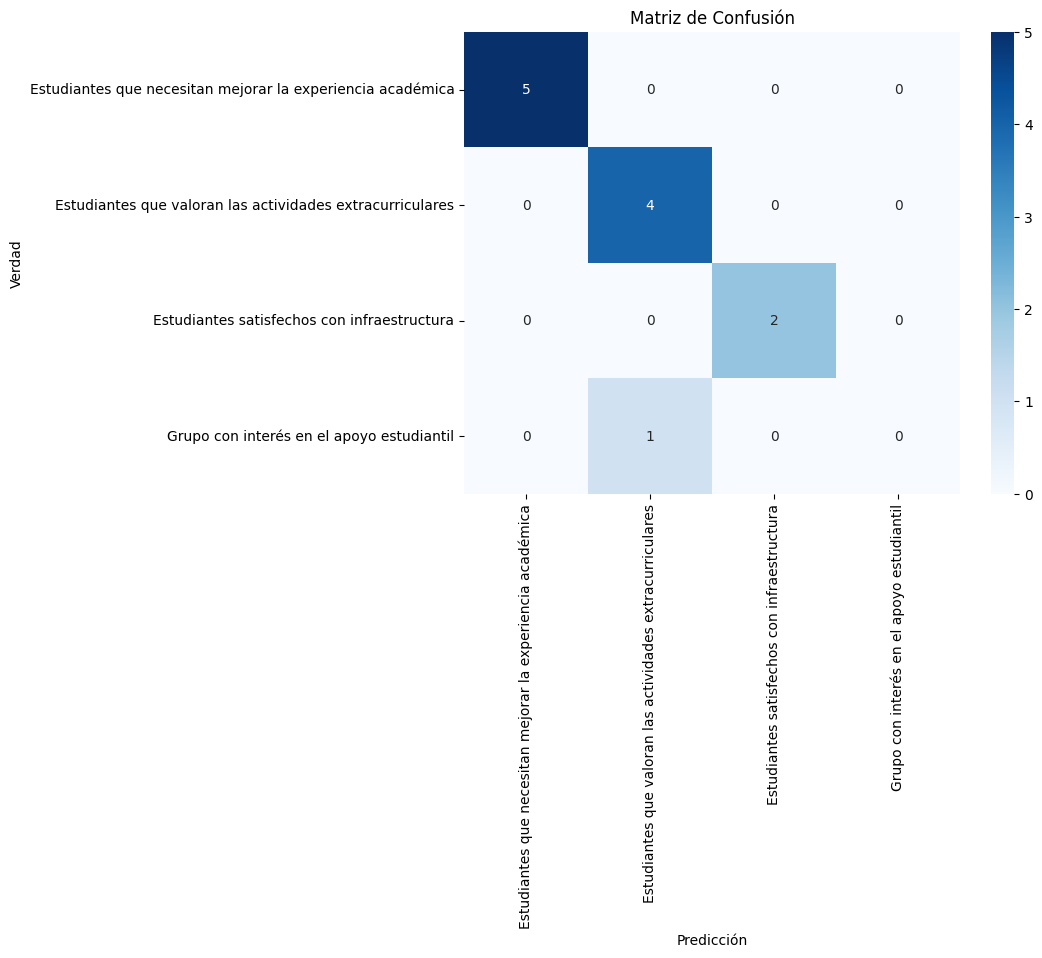

In [18]:
from sklearn.metrics import confusion_matrix # Import

y = y.astype('category')
# Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear y graficar
categories = y.cat.categories  # Extraer las categorías
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdad")
plt.show()

In [19]:
# Reporte de clasificación ajustado
print("\033[1m\033[34m \nReporte de Clasificación:\033[0m")
print(classification_report(y_test, y_pred, target_names=y.cat.categories, zero_division=0))

 
Reporte de Clasificación:
                                                            precision    recall  f1-score   support

Estudiantes que necesitan mejorar la experiencia académica       1.00      1.00      1.00         5
 Estudiantes que valoran las actividades extracurriculares       0.80      1.00      0.89         4
               Estudiantes satisfechos con infraestructura       1.00      1.00      1.00         2
                 Grupo con interés en el apoyo estudiantil       0.00      0.00      0.00         1

                                                  accuracy                           0.92        12
                                                 macro avg       0.70      0.75      0.72        12
                                              weighted avg       0.85      0.92      0.88        12

